# Personal Tracker 2020

In [1]:
"""
Tracker:
1) Count number of Mouse samples
2) Count number of Acute Human samples
3) Count number of Culture Human samples
4) COunt number of 63x go vs no go
5) Date Range Tracker Mouse/Human

"""

'\nTracker:\n1) Count number of Mouse samples\n2) Count number of Acute Human samples\n3) Count number of Culture Human samples\n4) COunt number of 63x go vs no go\n5) Date Range Tracker Mouse/Human\n\n'

##### Imports

In [2]:
import os
import pandas as pd
import csv
import logging

import seaborn as sns
import matplotlib.pyplot as plt

from temp_funcs import read_file, merge_dataframes, drop_cols, drop_nans, filter_date_range, \
filter_df, create_container_col, create_cond_df, create_container_df

In [3]:
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.35)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Paths/Fields

In [4]:
path = "C:/Users/kumar/Documents/Github/analysis_projects/"
csv_path = os.path.join(path, "csv/")

path_jem = os.path.join(csv_path, "jem_metadata.csv")

In [5]:
fields_jem = ["approach.creCell", "container", "date", "extraction.extractionNotes",
              "name", "organism_name", "rigOperator", "roi_major", "roi_minor", "status"]

##### Main

In [6]:
def main():
    """
    Prints the main menu 
    
    global variables:
        jem: jem dataframe
        mjem: mouse only data from jem
        hjem: human only data from jem
    """
    global jem, mjem, hjem
    
    jem = read_file(path_jem, fields_jem)
    jem = filter_df(jem, "rigOperator", "ramr")
    jem = filter_date_range(jem, "date")
    
    mjem = filter_df(jem, "organism_name", "Mouse")
    hjem = filter_df(jem, "organism_name", "Human")

In [7]:
if __name__ == "__main__":
    main()

INFO:temp_funcs:Read file in as a pandas dataframe
INFO:temp_funcs:Filtered dataframe based on rigOperator == ramr
C:\Users\kumar\Documents\Github\analysis_projects\personal_tracker_project\temp_funcs.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values([date_col], inplace=True)
INFO:temp_funcs:Filtered dataframe: 2020-01-01 - 2020-12-31
INFO:temp_funcs:Filtered dataframe based on organism_name == Mouse
INFO:temp_funcs:Filtered dataframe based on organism_name == Human


In [24]:
def view_counts():
    """
    """
    entry = input("Enter the counts you wish to see (a, m, h): ")
    if entry == "a":
        print(f"Overall total: {jem.name.count()}")
    elif entry == "m":
        print(f"Mouse samples total: {mjem.name.count()}")
    elif entry == "h":
        print(f"Human samples total: {hjem.name.count()}")
    else:
        print("Please enter from the following options (a, m, h)!")

In [ ]:
hajem = hjem[hjem["container_label"] != "PC"]
hcjem = create_cond_df(hjem, "container_label", ["PC"])

In [ ]:
["container"]

In [28]:
view_counts()

Enter the counts you wish to see (a, m, h): m
Mouse samples total: 120


In [27]:
hjem

,organism_name,name,approach.creCell,date,extraction.extractionNotes,rigOperator,status,roi_major,roi_minor,container
11121,Human,H20.26.401.12.03.01.03,None,2020-01-16 16:04:19 -0800,"#PD, des.",ramr,SUCCESS,TCx,layer 4,PAS4_200116_458_A01
11122,Human,H20.26.401.12.03.01.04,None,2020-01-16 16:04:19 -0800,"#ND, asc.",ramr,SUCCESS,TCx,layer 4,PAS4_200116_459_A01
11123,Human,H20.26.401.12.03.01.02,None,2020-01-16 16:04:19 -0800,"#PL, asc.",ramr,SUCCESS,TCx,layer 4,PAS4_200116_457_A01
11143,Human,H20.03.301.11.53.01.01,Cre+,2020-01-21 09:39:42 -0800,#L. Workflow crashed after this attempt. pxp was saved.,ramr,SUCCESS,TCx,layer 3c,PCS4_200121_451_A01
11180,Human,H20.03.302.11.10.01.06,None,2020-01-21 14:59:42 -0800,#ND,ramr,SUCCESS,TCx,layer 4,PAS4_200121_454_A01
11179,Human,H20.03.302.11.10.01.07,None,2020-01-21 14:59:42 -0800,#ND,ramr,SUCCESS,TCx,layer 4,PAS4_200121_455_A01
11178,Human,H20.03.302.11.10.01.02,None,2020-01-21 14:59:42 -0800,#ND,ramr,SUCCESS,TCx,layer 4,PAS4_200121_453_A01
11177,Human,H20.03.302.11.10.01.01,None,2020-01-21 14:59:42 -0800,#ND,ramr,SUCCESS,TCx,layer 4,PAS4_200121_452_A01
11176,Human,H20.03.302.11.10.01.08,None,2020-01-21 14:59:42 -0800,#ND,ramr,SUCCESS,TCx,layer 4,PAS4_200121_456_A01
11181,Human,H20.03.301.11.54.01.01,Cre+,2020-01-22 11:07:02 -0800,#D,ramr,SUCCESS,TCx,layer 2,PCS4_200122_451_A01


In [9]:
jem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 10990 to 11754
Data columns (total 10 columns):
organism_name                 152 non-null object
name                          152 non-null object
approach.creCell              152 non-null object
date                          152 non-null object
extraction.extractionNotes    152 non-null object
rigOperator                   152 non-null object
status                        152 non-null object
roi_major                     152 non-null object
roi_minor                     152 non-null object
container                     152 non-null object
dtypes: object(10)
memory usage: 13.1+ KB


In [10]:
jem["date"] = jem["date"].str[:10]
jem["date"] = jem["date"].astype('datetime64[ns]')
jem["month"] = jem["date"].dt.strftime('%b')

In [11]:
jem

,organism_name,name,approach.creCell,date,extraction.extractionNotes,rigOperator,status,roi_major,roi_minor,container,month
10990,Mouse,Gad2-IRES-Cre;Ai14-504549.11.06.01,Cre-,2020-01-07,#ND,ramr,SUCCESS,MOp,layer 2/3,PAS4_200107_451_A01,Jan
11004,Mouse,Vip-IRES-Cre;Ai14-504182.08.01.01,Cre-,2020-01-07,#ND,ramr,SUCCESS,RSPd,layer 5,PAS4_200107_452_A01,Jan
11033,Mouse,Slc32a1-IRES-Cre;Ai14-504560.08.02.04,Cre+,2020-01-10,#PD,ramr,SUCCESS,SSp,layer 5,PAS4_200110_454_A01,Jan
11034,Mouse,Slc32a1-IRES-Cre;Ai14-504560.08.02.02,Cre-,2020-01-10,#PL,ramr,SUCCESS,RSPd,layer 5,PAS4_200110_452_A01,Jan
11035,Mouse,Slc32a1-IRES-Cre;Ai14-504560.08.02.03,Cre+,2020-01-10,#ND,ramr,SUCCESS,SSp,layer 2/3,PAS4_200110_453_A01,Jan
...,...,...,...,...,...,...,...,...,...,...,...
11738,Mouse,Oxtr-T2A-Cre;Ai14-513094.09.06.03,Cre+,2020-03-03,"#PL, des.",ramr,SUCCESS,ORB,layer 5,PAS4_200303_453_A01,Mar
11740,Mouse,Oxtr-T2A-Cre;Ai14-513094.09.06.01,Cre+,2020-03-03,"#PL, asc.",ramr,SUCCESS,ORB,layer 5,PAS4_200303_451_A01,Mar
11748,Mouse,Htr3a-Cre_NO152;Ai14-514136.09.02.01,Cre+,2020-03-03,"#NL, des.",ramr,SUCCESS,MOp,layer 2/3,PAS4_200303_454_A01,Mar
11747,Mouse,Htr3a-Cre_NO152;Ai14-514136.09.02.02,Cre+,2020-03-03,"#rs comp WC: 32.861 MOhms, corr: 80%.",ramr,SUCCESS,MOs,layer 1,PAS4_200303_455_A01,Mar


In [12]:
jem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 10990 to 11754
Data columns (total 11 columns):
organism_name                 152 non-null object
name                          152 non-null object
approach.creCell              152 non-null object
date                          152 non-null datetime64[ns]
extraction.extractionNotes    152 non-null object
rigOperator                   152 non-null object
status                        152 non-null object
roi_major                     152 non-null object
roi_minor                     152 non-null object
container                     152 non-null object
month                         152 non-null object
dtypes: datetime64[ns](1), object(10)
memory usage: 14.2+ KB


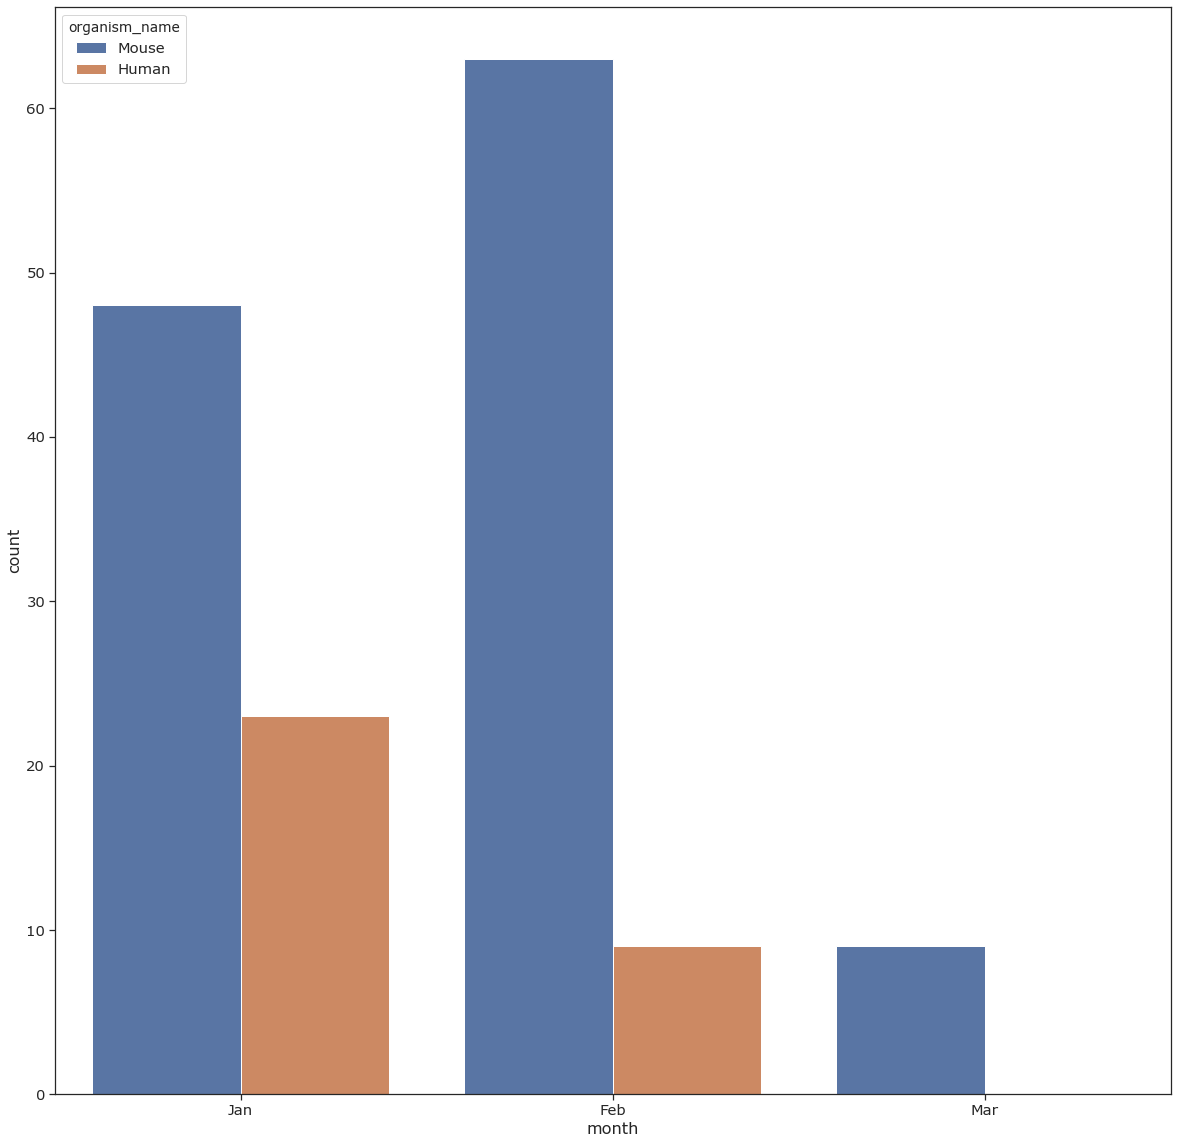

In [13]:
f, axes = plt.subplots(figsize=(20, 20))
sns.countplot(x="month", data=jem, hue="organism_name")

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'str'

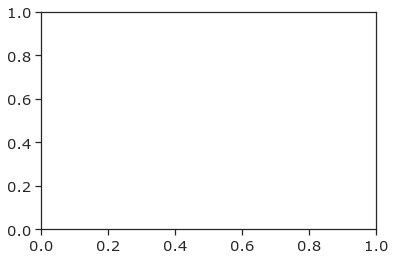

In [14]:
sns.distplot(jem)

In [ ]:
org_jem = jem[["date", "organism_name", "name", "container", "rigOperator", "status",
              "approach.creCell", "roi_major", "roi_minor", "extraction.extractionNotes"]]